In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
train_dg=ImageDataGenerator(vertical_flip=False,horizontal_flip=True,zoom_range=0.25,rescale=1/255,validation_split=0.2)

In [57]:
X_train=train_dg.flow_from_directory(directory="C:\\Users\\ASUS\\Desktop\\AI COURSE\\shapes",batch_size=32,class_mode="categorical"
                            ,target_size=(64,64),subset="training")

Found 11976 images belonging to 4 classes.


In [58]:
X_test=train_dg.flow_from_directory(directory="C:\\Users\\ASUS\\Desktop\\AI COURSE\\shapes",batch_size=32,class_mode="categorical"
                            ,target_size=(64,64),subset="validation")

Found 2994 images belonging to 4 classes.


In [143]:
X_train.class_indices

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}

In [111]:
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Convolution2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.preprocessing import image

In [100]:
model=Sequential()

In [101]:
model.add(Convolution2D(32,(32,32),activation='relu',input_shape=(64,64,3)))

In [102]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [103]:
model.add(Flatten())
model.add(Dense(150,kernel_initializer=RandomNormal,activation="relu"))
model.add(Dense(75,kernel_initializer=RandomNormal,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [104]:
model.compile(loss=CategoricalCrossentropy(),
             optimizer="adam",metrics=["accuracy"])

In [105]:
model.fit_generator(X_train,steps_per_epoch=len(X_train),epochs=1,validation_data=X_test,validation_steps=len(X_test))

375/375 [==============================] - 116s 310ms/step - loss: 0.1582 - accuracy: 0.9375 - val_loss: 0.0046 - val_accuracy: 0.9983


In [106]:
model.save("shapes.h5")

In [144]:
dic={0:'circle', 1:'square', 2:'star', 3:'triangle'}

In [119]:
img=image.load_img("C:\\Users\\ASUS\\Desktop\\AI COURSE\\shapes\\triangle\\680.png",target_size=(64,64))

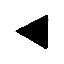

In [120]:
img

In [122]:
im=image.img_to_array(img)

In [126]:
import numpy as np

In [145]:
dic[np.where(model.predict(np.expand_dims(im,axis=0)))[1][0]]

'triangle'

In [131]:
import cv2

In [152]:
video=cv2.VideoCapture(0)
while 1:
    sucess,frame=video.read()
    cv2.imwrite('img.jpg',frame)
    img=image.load_img('img.jpg',target_size=(64,64))
    X=image.img_to_array(img)
    x=np.expand_dims(img,axis=0)
    pred=dic[np.where(model.predict(x))[1][0]]
    cv2.putText(frame,pred,(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()
video.release()